### Dependencies

In [3]:
! pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.8/432.8 kB 6.6 MB/s eta 0:00:00m eta 0:00:01

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


# Example of linearization and control of a dyn system



In [7]:
# matlab like environment, otherwise use import control
import control
from control.matlab import *

# A linear system 

In [14]:
# example of linear system

A = [[1,1], [0,1]]
B = [[0],[1]]
C = [[1,0], [0,1]]
D = [[0],[0]]

sys = ss(A,B,C,D)

print(sys)

<LinearIOSystem>: sys[6]
Inputs (1): ['u[0]']
Outputs (2): ['y[0]', 'y[1]']
States (2): ['x[0]', 'x[1]']

A = [[1. 1.]
     [0. 1.]]

B = [[0.]
     [1.]]

C = [[1. 0.]
     [0. 1.]]

D = [[0.]
     [0.]]



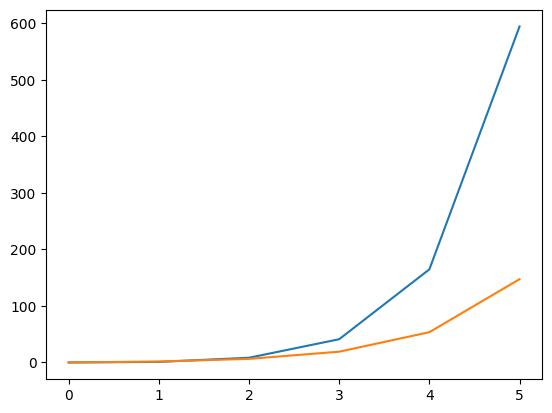

In [29]:
forcedresp = control.forced_response(sys, T=[0,1,2,3,4,5], U=[1,1,1,1,1,1])

import matplotlib.pyplot as plt

for s in forcedresp.states:
    plt.plot(forcedresp.time, s)

# 2D movement

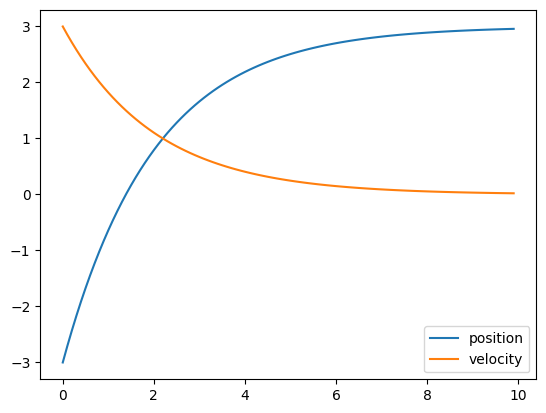

In [79]:
# parameters

F = 3
d = 0.5
x_0 = -3
v_0 = 3

A = [[0,1],[0, -d]]
B = [[0],[-1]]
C = [[1,0], [0,1]]
D = [[0],[0]]

# the system is controllable
ctrb(A,B)

sys = ss(A,B,C,D)

forcedresp = control.forced_response(
    sys,
    T=[ i/10 for i in range(100) ], 
    U=[0 for i in range(100)],
    X0=[x_0, v_0])


for s in forcedresp.states:
    plt.plot(forcedresp.time, s)
# plt.legend([f'x{i+1}' for i in range(len(forcedresp.states))])
plt.legend(['position', 'velocity'])




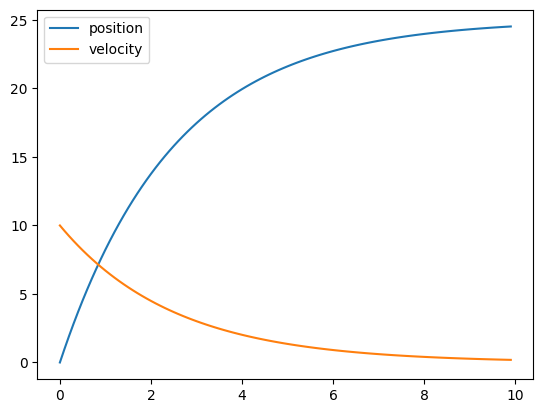

In [119]:
# parameters
import numpy as np

F = 3
d = 0.4
x_0 = 0
v_0 = 10

# by construction, the final setpoint gets to be 0
x_F = 10

A = [[0,1],[0, -d]]
B = [[0],[0]]
C = [[1,0], [0,1]]
D = [[0],[0]]

try:
    K = place(A, B, [-1.3, -0.2])
    sys = ss(A - K*B, D, C, D)
except:
    sys = ss(A, B, C, D)


forcedresp = control.forced_response(
    sys,
    T=[ i/10 for i in range(100) ], 
    U=[0 for i in range(100)],
    X0=[x_0, v_0])


for s in forcedresp.states:
    plt.plot(forcedresp.time, s)
# plt.legend([f'x{i+1}' for i in range(len(forcedresp.states))])
plt.legend(['position', 'velocity'])


closed loop


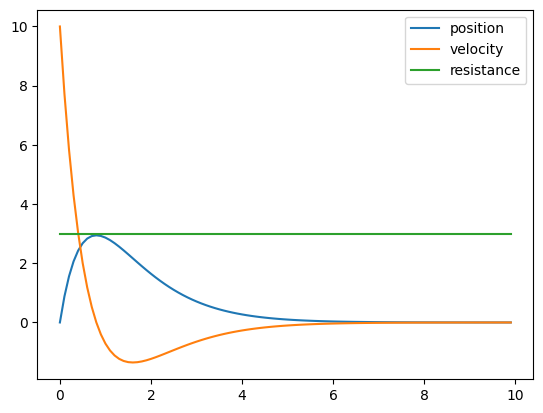

In [191]:
# parameters
import numpy as np

F = 3
d = 0.5
x_0 = 0
v_0 = 10

# by construction, the final setpoint gets to be 0
x_F = 10

A = [[0, 1, 0],[0, -d, 1],[0,0,0]]
B = [[0],[1],[0]]

C = [[1,0,0], [0,1,0], [0,0,1]]
D = [[0],[0],[0]]

try:
    print('closed loop')
    K = place(A, B, [-1.3, -1.2, 0])
    sys = ss(A - B*K, D, C, D)
except Exception as e:
    print(e)
    print('open loop')
    sys = ss(A, B, C, D)


forcedresp = control.forced_response(
    sys,
    T=[ i/10 for i in range(100) ], 
    U=[0 for i in range(100)],
    X0=[x_0, v_0, F])


for s in forcedresp.states:
    plt.plot(forcedresp.time, s)
# plt.legend([f'x{i+1}' for i in range(len(forcedresp.states))])
plt.legend(['position', 'velocity', 'resistance'])

# Optimize K

In [237]:
# parameters
import numpy as np

F = 3
d = 0.5
x_0 = 0
v_0 = 10

# by construction, the final setpoint gets to be 0
x_F = 10

A = [[0, 1, 0],[0, -d, 1],[0,0,0]]
B = [[0],[1],[0]]

C = [[1,0,0], [0,1,0], [0,0,1]]
D = [[0],[0],[0]]

Q = [[1,0,0], [0,1,0], [0,0,0]]
R = [[0.1]]


print('closed loop')
K = lqr(A, B, Q, R)[0]
sys = ss(A - B*K, D, C, D)

forcedresp = control.forced_response(
    sys,
    T=[ i/10 for i in range(100) ], 
    U=[0 for i in range(100)],
    X0=[x_0, v_0, F])


for s in forcedresp.states:
    plt.plot(forcedresp.time, s)
# plt.legend([f'x{i+1}' for i in range(len(forcedresp.states))])
plt.legend(['position', 'velocity', 'resistance'])

closed loop


LinAlgError: Failed to find a finite solution.

In [231]:
np.array([x_0, v_0, F]).T.__matmul__(np.array(Q)).__matmul__(np.array([x_0, v_0, F]))

0

In [235]:
np.array([0, 1, 0]).T.__matmul__(np.array(R)).__matmul__(np.array([0, 1, 0]))

0